# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# Libraries
import numpy as np 
import pandas as pd 
import matplotlib 
%matplotlib inline
from random import randint

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
# your code here
import random 


x = [randint(0, 9) for p in range(0, 10)]

df_DiceRolls = pd.DataFrame(x)
df_DiceRolls = df_DiceRolls.rename(columns={0: "Outcome"})
df_DiceRolls

,Outcome
0,9
1,0
2,8
3,2
4,9
5,5
6,2
7,1
8,1
9,2


#### 2.- Plot the results sorted by value.

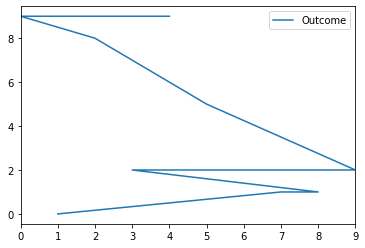

In [3]:
# your code here
sorted_results = df_DiceRolls.sort_values('Outcome')
sorted_results.plot()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

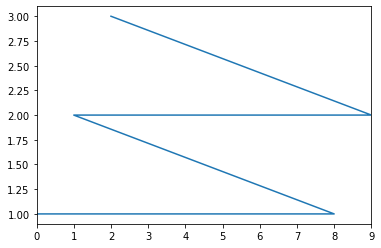

In [4]:
# your code here
sorted_results['Outcome'].value_counts()
sorted_results['Outcome'].value_counts().plot()

In [5]:
"""
The first graph shows every outcome, the second plot shows the frequency of every outcome
"""

'\nThe first graph shows every outcome, the second plot shows the frequency of every outcome\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [6]:
# your code here

def mean_(DataFrameColumn):
    lst = [x for x in DataFrameColumn]
    n = len(lst)
    return sum(lst)/n       
    
mean_(df_DiceRolls['Outcome'])

3.9

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [7]:
# your code here
def freq_(DataFrameColumn):
    lst = [x for x in DataFrameColumn]
    freq_ = []
    
    unique_values = []
    for element in lst: 
        if element not in unique_values:
            unique_values.append(int(element))
    
    unique_values.sort()
            
    for value in unique_values:
        count = 0 
        for element in lst:
            if value == element:
                count += 1
        freq_.append(tuple((value, count)))
    
    result = [(val * freq) for val, freq in freq_]
    mean = sum(result)/len(lst)
   
    return (freq_, mean)
    
print("The frequency of rolls is: {}".format(freq_(df_DiceRolls['Outcome'])[0]))
print("The mean of the outcomes is: {}".format(freq_(df_DiceRolls['Outcome'])[1]))

The frequency of rolls is: [(0, 1), (1, 2), (2, 3), (5, 1), (8, 1), (9, 2)]
The mean of the outcomes is: 3.9


#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [8]:
# your code here
def median_(DataFrameColumn):
    lst = [x for x in DataFrameColumn]
    lst.sort()
    if len(lst) % 2 == 0:
        md1 = int(len(lst) / 2 - 0.5)
        md2 = int(len(lst) / 2 + 0.5)
        median = (lst[md1] + lst[md2]) / 2
        return median
    else:
        md1 = int(len(lst / 2) + 0.5)
        median = lst[md1]
        print("uneven")
        return median
    
print("The median is: {}".format(median_(df_DiceRolls['Outcome'])))
    

The median is: 2.0


#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [9]:
# your code here
def quartiles_(DataFrameColumn):
    lst = [x for x in DataFrameColumn]
    lst.sort()
     
    if len(lst) % 2 == 0:
        q1a = int(len(lst) * .25 - 0.5)
        q1b = int(len(lst) * .25 + 0.5)
        q1 = (lst[q1a] + lst[q1b]) / 2
        
        md1 = int(len(lst) * .5 - 0.5)
        md2 = int(len(lst) * .5 + 0.5)
        median = (lst[md1] + lst[md2]) / 2
        
        q3a = int(len(lst) * .75 - 0.5)
        q3b = int(len(lst) * .75 + 0.5)
        q3 = (lst[q3a] + lst[q3b]) / 2
        return (q1, median, q3)
    
    else:
        q1a = int(len(lst) * .25 + 0.5)
        q1 = (lst[q1a] + lst[q1b]) / 2
        md1 = int(len(lst * .5) + 0.5)
        median = lst[md1]
        q3a = int(len(lst) * .25 + 0.75)
        q3 = (lst[q3a] + lst[q3b]) / 2
        return (q1, median, q3)
    
print("The first quartile is: {}\nThe median is: {}\nThe third quartile is:{}".format(quartiles_(df_DiceRolls['Outcome'])[0], quartiles_(df_DiceRolls['Outcome'])[1], quartiles_(df_DiceRolls['Outcome'])[2]))

The first quartile is: 1.5
The median is: 2.0
The third quartile is:8.5


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

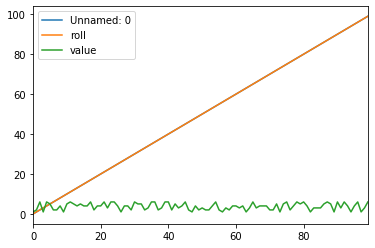

In [10]:
# your code here
data = pd.read_csv('../data/roll_the_dice_hundred.csv')
data.plot()

In [11]:
"""
the outcome of the dice is normally distributed
"""

'\nthe outcome of the dice is normally distributed\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [12]:
# your code here
mean_(data['value'])

3.74

#### 3.- Now, calculate the frequency distribution.


In [13]:
# your code here
print("The frequency of rolls is: {}".format(freq_(data['value'])[0]))
print("The mean of the outcomes is: {}".format(freq_(data['value'])[1]))

The frequency of rolls is: [(1, 12), (2, 17), (3, 14), (4, 22), (5, 12), (6, 23)]
The mean of the outcomes is: 3.74


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

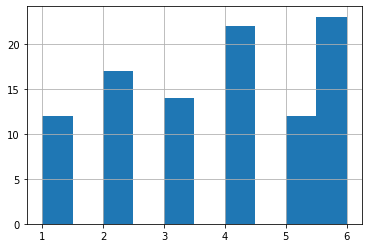

In [14]:
# your code here
data['value'].hist()

In [15]:
"""
The outcomes are spread equally, the mean is between 3 and 4 
"""

'\nThe outcomes are spread equally, the mean is between 3 and 4 \n'

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

3    175
1    175
4    168
2    167
6    166
5    149
Name: value, dtype: int64

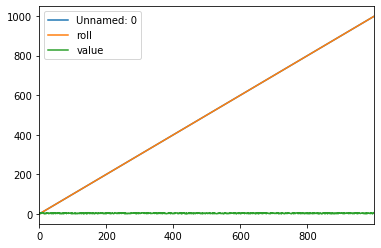

In [16]:
# your code here
data2 = pd.read_csv('../data/roll_the_dice_thousand.csv')
data2.plot()
data2['value'].value_counts()

In [17]:
"""
The line flattened 
"""

'\nThe line flattened \n'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [18]:
# your code here
ages = pd.read_csv('../data/ages_population.csv')
print(ages.head())
print("")

   observation
0         68.0
1         12.0
2         45.0
3         38.0
4         49.0



' range is 0 - 82\n    mean is 40 \n    std  is 15'

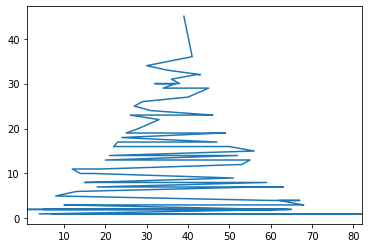

In [19]:
ages['observation'].value_counts().plot()
''' range is 0 - 82
    mean is 40 
    std  is 15'''

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [20]:
# your code here
print(ages.describe())

       observation
count    1000.0000
mean       36.5600
std        12.8165
min         1.0000
25%        28.0000
50%        37.0000
75%        45.0000
max        82.0000


#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

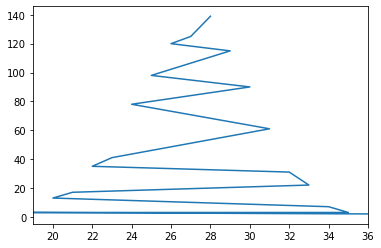

In [21]:
# your code here
ages2 = pd.read_csv('../data/ages_population2.csv')
ages2['observation'].value_counts().plot()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [22]:
"""
The range is reduced
"""

'\nThe range is reduced\n'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [23]:
# your code here
ages2.describe()

,observation
count,1000.000000
mean,27.155000
std,2.969814
min,19.000000
25%,25.000000
50%,27.000000
75%,29.000000
max,36.000000


In [24]:
"""
Because the range is lower also the mean and std dev are lower.
"""

'\nBecause the range is lower also the mean and std dev are lower.\n'

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

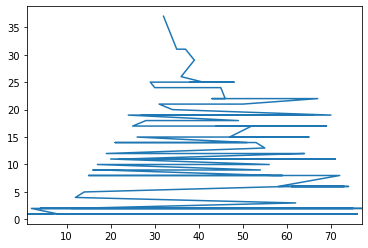

In [25]:
# your code here
ages3 = pd.read_csv('../data/ages_population3.csv')
ages3['observation'].value_counts().plot()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [26]:
# your code here
ages3.describe()

,observation
count,1000.000000
mean,41.989000
std,16.144706
min,1.000000
25%,30.000000
50%,40.000000
75%,53.000000
max,77.000000


In [27]:
"""
the range is higher and so is the std dev and mean 
"""

'\nthe range is higher and so is the std dev and mean \n'

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [28]:
# your code here
ages3.describe()

,observation
count,1000.000000
mean,41.989000
std,16.144706
min,1.000000
25%,30.000000
50%,40.000000
75%,53.000000
max,77.000000


In [29]:
"""
median - mean = 1.989
"""

'\nmedian - mean = 1.989\n'

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [30]:
# your code here
ages3['observation'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

0.0     1.0
0.1    22.0
0.2    28.0
0.3    32.0
0.4    36.0
0.5    40.0
0.6    45.0
0.7    50.0
0.8    57.0
0.9    67.0
1.0    77.0
Name: observation, dtype: float64

In [31]:
"""
your comments here
"""

'\nyour comments here\n'

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.